# Pneumonia Prediction Using Chest X-Ray Images

## Introduction

Pneumonia remains a significant public health challenge across the globe, contributing to considerable morbidity and mortality rates, particularly among the young, the elderly, and the immunocompromised. Rapid and accurate diagnosis is crucial for effective treatment and management of the disease. In recent years, the advent of machine learning and deep learning techniques has revolutionised the field of medical imaging, offering new avenues for enhancing diagnostic processes.

This project aims to harness the potential of Convolutional Neural Networks (CNNs), a class of deep neural networks highly effective in analysing visual imagery, to develop a predictive model for pneumonia based on chest X-ray images. The dataset, sourced from Kaggle, comprises numerous X-ray images categorised into 'NORMAL' and 'PNEUMONIA', providing a basis for training and evaluating our predictive models.

Beyond mere prediction, this endeavour seeks to integrate Explainable AI (XAI) techniques to shed light on the model's decision-making processes. The objective is not only to achieve high accuracy in pneumonia detection but also to enhance the interpretability and transparency of the predictions, thereby fostering trust and understanding among healthcare professionals.

In navigating through this project, we will embark on a comprehensive journey encompassing data preparation, model selection and evaluation, and the incorporation of XAI for insightful interpretations. Our ultimate goal is to contribute to the broader efforts in combating pneumonia through the innovative application of AI in medical diagnostics.

# Table of Contents

- [Introduction](#introduction)
- [Project Objectives](#project-objectives)
- [Data Preparation](#data-preparation)
  - [Dataset Overview](#dataset-overview)
  - [Data Pre-processing](#data-pre-processing)
    - [Image Resizing and Normalization](#image-resizing-and-normalization)
    - [Data Augmentation](#data-augmentation)
  - [Data Splitting](#data-splitting)
- [Model Selection and Development](#model-selection-and-development)
  - [Baseline CNN Model](#baseline-cnn-model)
  - [Pre-trained Models](#pre-trained-models)
    - [Transfer Learning](#transfer-learning)
- [Training and Validation](#training-and-validation)
  - [Model Training](#model-training)
  - [Hyperparameter Tuning](#hyperparameter-tuning)
  - [Validation and Model Selection](#validation-and-model-selection)
- [Explainable AI (XAI) Techniques](#explainable-ai-xai-techniques)
  - [Feature Visualization](#feature-visualization)
  - [Model Interpretability with SHAP and LIME](#model-interpretability-with-shap-and-lime)
- [Model Evaluation](#model-evaluation)
  - [Performance Metrics](#performance-metrics)
  - [Testing and Analysis](#testing-and-analysis)
- [Interpretability and Insights](#interpretability-and-insights)
  - [Applying XAI Techniques](#applying-xai-techniques)
  - [Discussion of Model Decisions](#discussion-of-model-decisions)
- [Conclusion and Future Work](#conclusion-and-future-work)
  - [Project Summary](#project-summary)
  - [Limitations and Challenges](#limitations-and-challenges)
  - [Future Directions](#future-directions)


## Project Objectives

The primary aim of this project is to develop a highly accurate predictive model for diagnosing pneumonia from chest X-ray images. In achieving this goal, the project is guided by several key objectives:

- **To Leverage Advanced Machine Learning Techniques:** Utilise Convolutional Neural Networks (CNNs) and transfer learning from pre-trained models to analyse and classify chest X-ray images into 'NORMAL' and 'PNEUMONIA' categories.

- **To Improve Diagnostic Efficiency:** Enhance the speed and accuracy of pneumonia diagnosis compared to traditional methods, potentially reducing the time between patient presentation and treatment initiation.

- **To Implement Explainable AI (XAI) Methods:** Incorporate XAI techniques to provide transparency and understanding of the model's decision-making process, thereby fostering trust among healthcare professionals and facilitating the clinical adoption of the model.

- **To Evaluate Model Performance Rigorously:** Use a comprehensive set of performance metrics to evaluate the models, including accuracy, precision, recall, and F1 scores, along with sensitivity and specificity, to ensure the model's reliability in clinical settings.

- **To Contribute to Medical Research and Practice:** Offer insights and tools that can be integrated into clinical workflows, aiding in the early detection of pneumonia and potentially improving patient outcomes.

- **To Explore Future Applications and Improvements:** Identify limitations and challenges encountered during the project as a foundation for future research, including the exploration of models for other diseases or conditions identifiable through chest X-rays.

By meeting these objectives, the project aims to make a significant contribution to the field of medical imaging and diagnostics, leveraging the latest advancements in artificial intelligence and machine learning for the betterment of patient care.


## Data Preparation

Proper preparation of the data is crucial for the success of any machine learning project. This section outlines the steps taken to prepare the chest X-ray images for the pneumonia prediction model, including dataset overview, preprocessing steps, and data splitting.

### Dataset Overview

The dataset for this project comprises chest X-ray images sourced from Kaggle, specifically designed to facilitate the development of machine learning models capable of distinguishing between normal and pneumonia-afflicted lung images. This dataset is a critical resource for our project, offering a real-world application for advanced machine learning techniques in medical diagnostics. It is divided into three main sets: training, validation, and testing, each containing images labeled either 'NORMAL' or 'PNEUMONIA'. Understanding the composition, structure, and characteristics of this dataset is pivotal for effective model training and validation.

To gain a comprehensive understanding of our dataset, we begin by exploring its basic properties, such as the total number of images, the resolution of these images, and the distribution of images across the 'NORMAL' and 'PNEUMONIA' categories. This preliminary analysis is crucial for informing our data preparation and augmentation strategies, ensuring that our models are trained on balanced and representative data.

Typically, Python's libraries such as Pandas for data manipulation and Matplotlib or Seaborn for visualization are instrumental in this stage. The following section carries out important EDA (Exploratory Data Analysis) tasks to understand the dataset's structure and characteristics.

In [89]:
# Determine the location of the dataset and its structure
test_images_dir = 'chest_xray/test'
train_images_dir = 'chest_xray/train'
val_images_dir = 'chest_xray/val'

In [90]:
# import libraries
import os

# Count the number of images in each set
num_test_normal = len(os.listdir(os.path.join(test_images_dir, 'NORMAL')))
num_test_pneumonia = len(os.listdir(os.path.join(test_images_dir, 'PNEUMONIA')))
num_train_normal = len(os.listdir(os.path.join(train_images_dir, 'NORMAL')))
num_train_pneumonia = len(os.listdir(os.path.join(train_images_dir, 'PNEUMONIA')))
num_val_normal = len(os.listdir(os.path.join(val_images_dir, 'NORMAL')))
num_val_pneumonia = len(os.listdir(os.path.join(val_images_dir, 'PNEUMONIA')))

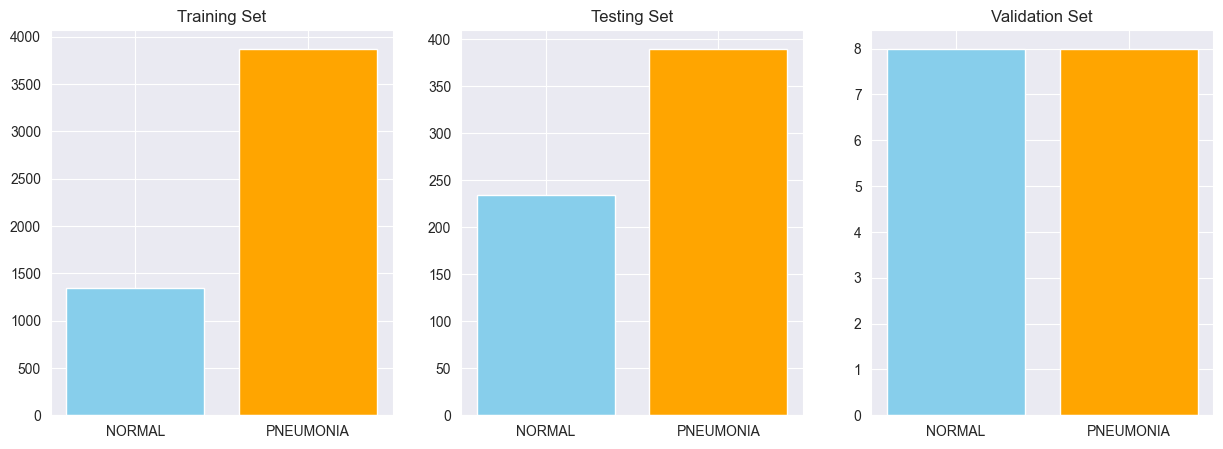

In [91]:
# visualise the distribution of images, use a separate chart for each set, but on the same output
import matplotlib.pyplot as plt

# Create a bar chart
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(['NORMAL', 'PNEUMONIA'], [num_train_normal, num_train_pneumonia], color=['skyblue', 'orange'])
ax[0].set_title('Training Set')
ax[1].bar(['NORMAL', 'PNEUMONIA'], [num_test_normal, num_test_pneumonia], color=['skyblue', 'orange'])
ax[1].set_title('Testing Set')
ax[2].bar(['NORMAL', 'PNEUMONIA'], [num_val_normal, num_val_pneumonia], color=['skyblue', 'orange'])
ax[2].set_title('Validation Set')
plt.show()


The distribution plot of the chest X-ray image dataset reveals a considerable class imbalance across the testing and training sets, with a notably higher number of 'PNEUMONIA' images than 'NORMAL'. Such an imbalance can predispose a predictive model to bias, where it may overfit to the more represented class ('PNEUMONIA') and underperform in correctly identifying the less represented class ('NORMAL'). This could lead to a high rate of false negatives, which, in a medical context, is particularly dangerous as it would mean missing cases of pneumonia.

The validation set, in contrast, maintains a balanced distribution, which is essential for accurately evaluating the model's performance without a skew towards the 'PNEUMONIA' class. However, the small size of the validation set as indicated by the scale of its y-axis could be a concern, as it may not represent the full complexity of the problem space.

To mitigate the risks of class imbalance before training the model, several strategies can be considered. One common approach is to augment the 'NORMAL' class by generating synthetic images through various transformations like rotations, flips, or adding noise. Alternatively, one could also employ under-sampling of the 'PNEUMONIA' class to equalize the number of samples, although this would mean discarding potentially valuable data. Another sophisticated method involves adjusting the loss function to give higher weight to the underrepresented class, thereby increasing the cost of misclassifying the 'NORMAL' images.

It's essential to implement these adjustments carefully, as they can significantly affect the model's learning process and its subsequent ability to generalise to new, unseen data. The ultimate goal is to train a model that not only performs well across the metrics of accuracy, precision, and recall but also one that can be relied upon in real-world medical diagnostics, where the stakes are inherently high.

In [92]:
# Display the resolution of the images
from PIL import Image

In [93]:
# Function to get the resolution of the images
def collect_image_resolutions(base_dir):
    resolutions = []
    for category in ['NORMAL', 'PNEUMONIA']:
        category_dir = os.path.join(base_dir, category)
        for image_name in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_name)
            with Image.open(image_path) as img:
                resolutions.append(img.size)  # (width, height)
    return resolutions

In [94]:
# Collecting resolutions
test_resolutions = collect_image_resolutions(test_images_dir)
train_resolutions = collect_image_resolutions(train_images_dir)
val_resolutions = collect_image_resolutions(val_images_dir)

In [95]:
# Function to plot resolutions
def plot_resolutions(resolutions, title):
    widths, heights = zip(*resolutions)  # Unpacking
    plt.hist2d(widths, heights, bins=(50, 50), cmap=plt.cm.jet)
    plt.colorbar()
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(title)

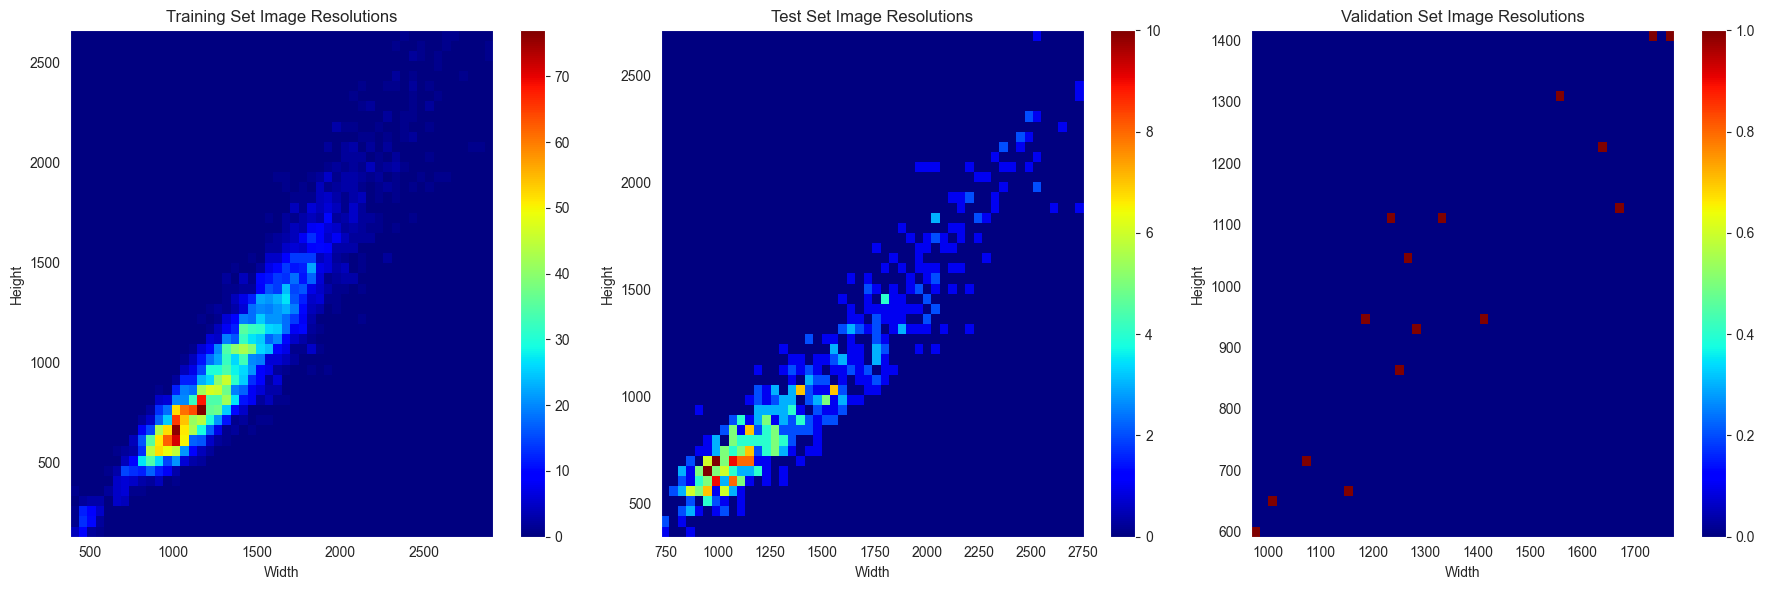

In [96]:
# Plotting the distributions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_resolutions(train_resolutions, 'Training Set Image Resolutions')

plt.subplot(1, 3, 2)
plot_resolutions(test_resolutions, 'Test Set Image Resolutions')

plt.subplot(1, 3, 3)
plot_resolutions(val_resolutions, 'Validation Set Image Resolutions')

plt.tight_layout()
plt.show()

The visualisation presents a 2D histogram of image resolutions across the testing, training, and validation sets. It highlights a broad range of image sizes, with certain resolutions appearing more frequently, as indicated by the density of points in specific areas.

The Training Set shows tight pattern with a dense concentration of images. The most common resolutions are centred around 1100x700 pixels. There is diagonal clustering, suggesting a proportional increase in both width and height among the majority of images, meaning that a lot of the images follow a similar aspect ratio.

For the Test Set, we notice similar patterns, with a high concentration of images still being around the 1100x700 pixel range and all being on a diagonal. We can imfer that the test set is similar to the training set in terms of image resolutions and aspect ratio, despite the fewer number of images.

The Validation Set, on the other hand, is more varied, with a wider spread of image resolutions. We can loosely identify a cluster around 1300x1100 pixels, as well as a vague diagonal pattern. This suggests that the validation set may have a slightly more diverse set of images in terms of aspect ratio and resolution. However, this could actually be beneficial for a trained model in order to test its generalisation to new, unseen data.

Before training a model, it's crucial to standardise the image resolutions across all sets to ensure that the model learns features that are scale-invariant and generalizes well to new data. This typically involves resizing all images to a common resolution. Given the range of resolutions observed, we would select a size that balances the retention of detail with computational efficiency. For instance, if most images are around 1100x700 pixels, we might resize all images to this dimension. Additionally, maintaining a consistent aspect ratio by using padding or cropping methods where necessary would be important to preserve the original content of the X-rays without distortion.

In [97]:
# Display a few sample images from each category
import random

In [98]:
# Function to display random images from each category
def display_random_images(base_dir, categories, num_images=5):
    fig, axes = plt.subplots(nrows=len(categories), ncols=num_images, figsize=(num_images * 3, len(categories) * 3))
    for row, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        image_files = os.listdir(category_dir)
        random_images = random.sample(image_files, num_images)
        for col, image_file in enumerate(random_images):
            image_path = os.path.join(category_dir, image_file)
            image = Image.open(image_path)
            ax = axes[row, col]
            ax.imshow(image, cmap='gray')
            ax.axis('off')
            if col == 0:
                ax.set_title(category)
    plt.tight_layout()
    plt.show()

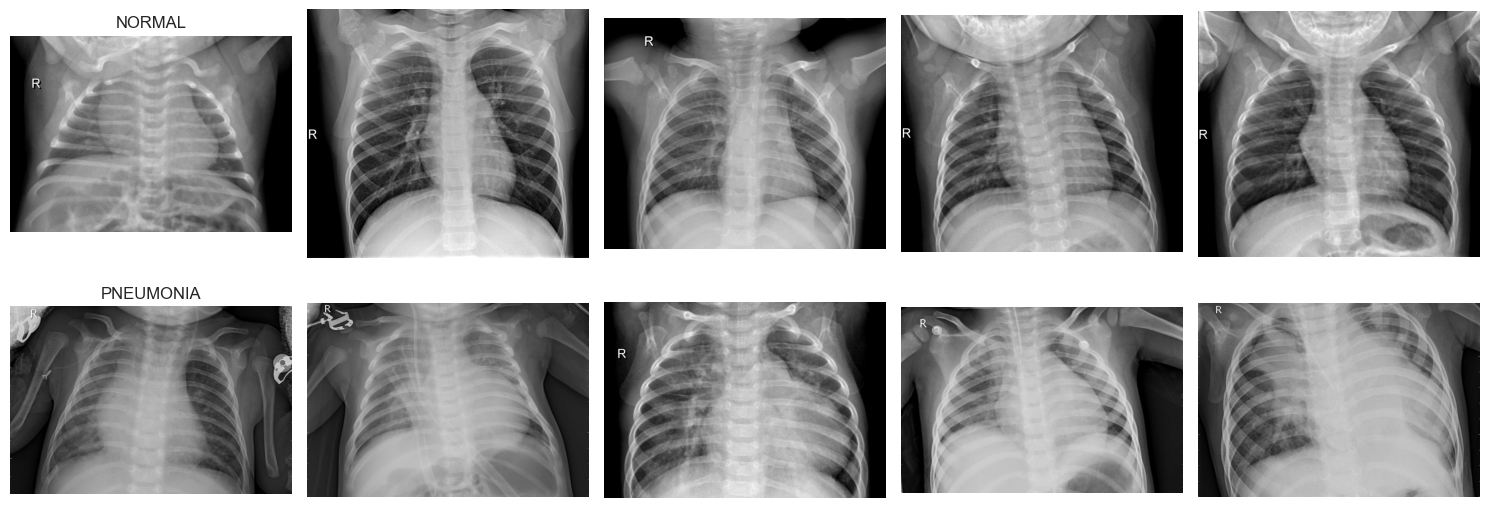

In [99]:
# Displaying random images for visual analysis from the training set
display_random_images(train_images_dir, ['NORMAL', 'PNEUMONIA'])

The collection of chest X-ray images labeled 'NORMAL' and 'PNEUMONIA' provides critical insights into the visual indicators associated with each condition. In the 'NORMAL' images, the lungs are typically free of significant abnormalities, displaying clear lung fields, well-defined diaphragms, and unobstructed costophrenic angles. These characteristics are essential for a model to learn as they represent the absence of disease.

On the other hand, the 'PNEUMONIA' images show various abnormal patterns, such as areas of increased opacity indicating lung consolidation, which is characteristic of an infectious process in the lung tissue. These patterns may vary in intensity and location but are critical markers for the presence of pneumonia.

Before training a model, it's crucial to ensure the dataset includes a representative variety of these visual features across both conditions. The dataset should be balanced, not only in terms of the number of images but also in terms of the diversity of manifestations of pneumonia. This may require augmenting the data with more examples, especially of underrepresented patterns. Additionally, preprocessing steps such as image normalization and contrast enhancement might be needed to ensure the model is not learning from irrelevant variations in the image data, such as different lighting conditions or X-ray exposures. The end goal is to train a model on data that is as close to the real-world clinical scenarios as possible, allowing for accurate and reliable detection of pneumonia from chest X-rays.

To the untrained eye, the visual differences between 'NORMAL' and 'PNEUMONIA' images may not be immediately apparent. However, a well-trained model should be able to discern these differences and make accurate predictions based on them. This is where the power of deep learning and CNNs comes into play, as they can learn to identify complex patterns and features that are not easily discernible to humans.

### Data Pre-processing

Data pre-processing involves several steps to make the images suitable for feeding into our CNN models. This includes resizing images, normalising aspect ratios, normalising pixel values, and potentially augmenting the data to improve model robustness.

#### Image Resizing and Letterboxing

Ensuring that all images in a dataset are of a consistent size is a critical prerequisite for training convolutional neural networks (CNNs), which typically require fixed-size inputs. The process of resizing and letterboxing is therefore employed to transform the diverse resolutions of chest X-ray images to a uniform dimension, allowing for batch processing and the effective learning of features by the CNN. By scaling the images to maintain their original aspect ratio and adding borders to achieve the required size, we prevent distortion that could potentially affect the model's ability to accurately learn and classify the images. This standardisation is essential for a fair comparison between different images and is crucial for the integrity and reliability of the predictive model's performance.

In [100]:
# Resize and letterbox the images for a consistent input size to the CNN
base_dir = 'chest_xray'
processed_base_dir = 'processed_chest_xray'

In [101]:
# Directories for the original and processed datasets
original_dirs = {
    'test': os.path.join(base_dir, 'test'),
    'train': os.path.join(base_dir, 'train'),
    'val': os.path.join(base_dir, 'val')
}

In [102]:
# Create the processed directories, mirroring the original structure
for dataset_type, dir_path in original_dirs.items():
    for category in ['NORMAL', 'PNEUMONIA']:
        # Create new directory for processed images
        new_dir_path = os.path.join(processed_base_dir, dataset_type, category)
        os.makedirs(new_dir_path, exist_ok=True)

In [103]:
# Function to resize and letterbox an image
def resize_and_letterbox(image, size=(1024, 1024)):
    # Resize image, maintaining aspect ratio
    image.thumbnail(size, Image.Resampling.LANCZOS)
    
    # Create a new image with white background and letterbox the original image
    letterboxed_image = Image.new("RGB", size, "black")
    # Calculate position to paste the resized image onto the white background
    position = ((size[0] - image.size[0]) // 2, (size[1] - image.size[1]) // 2)
    letterboxed_image.paste(image, position)
    
    return letterboxed_image

In [104]:
# Iterate over each dataset type and process images
for dataset_type, dir_path in original_dirs.items():
    for category in ['NORMAL', 'PNEUMONIA']:
        category_dir = os.path.join(dir_path, category)
        for image_name in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_name)
            with Image.open(image_path) as img:
                # Resize and letterbox the image
                processed_image = resize_and_letterbox(img)
                # Save the processed image to the new location
                processed_image_path = os.path.join(processed_base_dir, dataset_type, category, image_name)
                processed_image.save(processed_image_path, "JPEG")

In [105]:
# Confirm the changes to the images by plotting the distributions of the new resolutions again

# Collecting resolutions
processed_test_resolutions = collect_image_resolutions(os.path.join(processed_base_dir, 'test'))
processed_train_resolutions = collect_image_resolutions(os.path.join(processed_base_dir, 'train'))
processed_val_resolutions = collect_image_resolutions(os.path.join(processed_base_dir, 'val'))

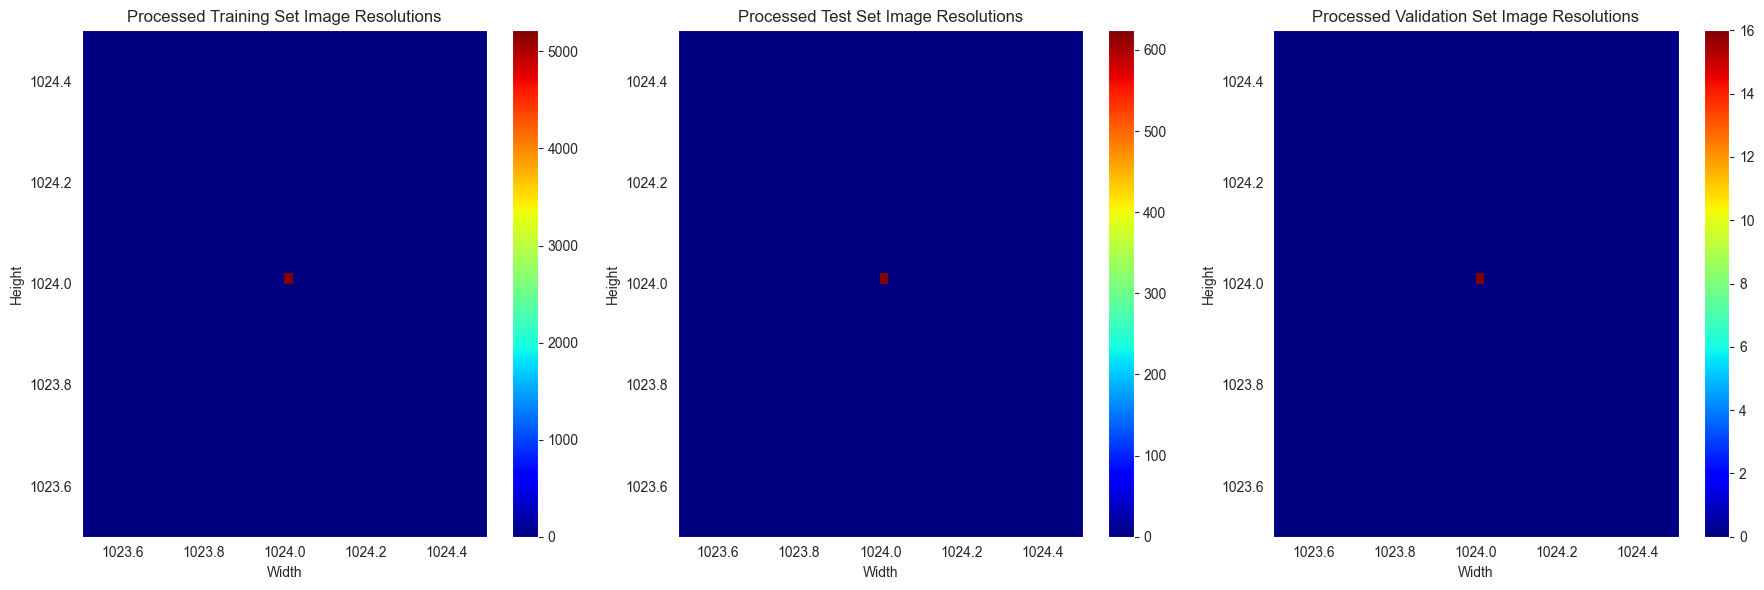

In [106]:
# Plotting the distributions
plt.figure(figsize=(18, 6)) 

plt.subplot(1, 3, 1)
plot_resolutions(processed_train_resolutions, 'Processed Training Set Image Resolutions')

plt.subplot(1, 3, 2)
plot_resolutions(processed_test_resolutions, 'Processed Test Set Image Resolutions')

plt.subplot(1, 3, 3)
plot_resolutions(processed_val_resolutions, 'Processed Validation Set Image Resolutions')

plt.tight_layout()
plt.show()

The colour map plot vividly illustrates the successful standardisation of image resolutions following the resizing and letterboxing process across the processed training, test, and validation sets. Each set now uniformly presents images with dimensions of 1024x1024 pixels. The tight clustering of points at the precise coordinates of 1024 in both width and height confirms the absence of any variation in size, a clear indication that the preprocessing objectives have been met.

This uniformity is critical for the subsequent steps of the project, ensuring that the convolutional neural network (CNN) receives consistently shaped input data. It eliminates the variability in image size that could otherwise introduce unnecessary complexity into the feature learning phase of model training. With this level of standardisation, the CNN can focus on learning the distinguishing features pertinent to pneumonia diagnosis, devoid of any distractions or noise stemming from differing image resolutions.

#### Image Normalisation

Additionally, image normalisation is a vital step in preparing data for deep learning models, especially for tasks involving image recognition. This process involves adjusting the pixel intensity of images so that they have the same scale. For neural networks, this typically means transforming the pixel values to a standard range, usually between 0 and 1. By normalising the images, we reduce the variability that arises from different lighting conditions and image contrasts, which can significantly affect the network's ability to learn effectively. Normalised data accelerates the convergence during training, leading to faster learning and better generalisation from the model. Hence, normalisation is not just a preprocessing step, but a fundamental aspect that can substantially influence the success of the machine learning project.

This would not usually be done to an image being saved to disk, or displayed to a human, but is essential for training a neural network and will be implemented as part of the data pipeline for the model. here is an example of how this can be done using the `tf.keras` library.

```python
import tensorflow as tf

# Load an image using tf.keras
image = tf.keras.preprocessing.image.load_img('path_to_image.jpg')

# Convert the image to a numpy array
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Normalise the pixel values
normalised_image_array = image_array / 255.0
```
This code snippet demonstrates the process of loading an image, converting it to a numpy array, and then normalising the pixel values by dividing by 255.0. This simple step is crucial for ensuring that the images are ready for training a neural network, and will be incorporated into the data pipeline for the pneumonia prediction model.

#### Data Augmentation

Data augmentation is a technique used to increase the diversity of a dataset by applying various transformations to the existing data. In the realm of image processing, this could include alterations such as rotation, scaling, flipping, or adding noise, which can generate additional training samples from the original dataset. The purpose of these transformations is to simulate different perspectives and variations that a model may encounter in real-world scenarios, thereby enhancing its ability to generalise.

For this project, data augmentation is particularly necessary to address the imbalance between the 'NORMAL' and 'PNEUMONIA' image classes. Since 'NORMAL' images are underrepresented, the model may develop a bias towards 'PNEUMONIA' examples, potentially leading to a higher misclassification rate of normal cases. By artificially expanding the 'NORMAL' dataset through augmentation, we aim to balance the class distribution, providing the model with sufficient examples of both conditions. This balance is crucial to train a robust model that performs well across all categories, ensuring accurate and reliable pneumonia detection.

In [14]:
import tensorflow as tf
import numpy as np
import os

In [15]:
# Base directory where the processed images are stored
base_dir = 'processed_chest_xray'

# Subsets to augment
subsets = ['test', 'train']

In [16]:
# Augmentation configuration, with values chosen to simulate realistic variations in patient positioning and X-ray capture without distorting the content of the images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
def augment_normal_images(subset, target_count):
    normal_dir = os.path.join(base_dir, subset, 'NORMAL')
    pneumonia_dir = os.path.join(base_dir, subset, 'PNEUMONIA')
    
    normal_images = os.listdir(normal_dir)
    pneumonia_images = os.listdir(pneumonia_dir)
    num_normal = len(normal_images)
    num_pneumonia = len(pneumonia_images)
    
    # Calculate how many new images are needed
    new_images_needed = target_count - num_normal
    
    # Only augment if there are fewer normal images than pneumonia images
    if new_images_needed > 0:
        for i in range(new_images_needed):
            # Select a random image to augment
            img_name = np.random.choice(normal_images)
            img_path = os.path.join(normal_dir, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path)
            x = tf.keras.preprocessing.image.img_to_array(img)
            x = x.reshape((1,) + x.shape)
            
            # Save the augmented images
            prefix = f'aug_{i}_'
            for batch in datagen.flow(x, batch_size=1, save_to_dir=normal_dir, save_prefix=prefix, save_format='jpeg'):
                break  # Only generate one image per original image

In [18]:
for subset in subsets:
    # Determine the number of images in the PNEUMONIA set to match
    pneumonia_count = len(os.listdir(os.path.join(base_dir, subset, 'PNEUMONIA')))
    augment_normal_images(subset, pneumonia_count)

### Data Splitting

## Model Selection and Development

### Baseline CNN Model

### Pre-trained Models

#### Transfer Learning

## Training and Validation

### Model Training

### Hyperparameter Tuning

### Validation and Model Selection

## Explainable AI (XAI) Techniques

### Feature Visualisation

### Model Interpretability with SHAP and LIME

## Model Evaluation

### Performance Metrics

### Testing and Analysis

## Interpretability and Insights

### Applying XAI Techniques

### Discussion of Model Decisions

## Conclusion and Future Work

### Project Summary

### Limitations and Challenges

### Future Directions